# milliPillar calcium tissue batch analysis
#### Author: Youngbin Kim
#### Last updated: 06/23/21

### Import packages

In [1]:
import millipillar as mp
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
import os.path
import glob
import tkinter as tk
from tkinter import filedialog

### Select folder containing videos to be analyzed

#### For ND2 files

In [2]:
# asks for file path of your video
root = tk.Tk()
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
folder_path = filedialog.askdirectory()
file_paths = glob.glob(os.path.join(folder_path, "**/*.nd2"), recursive=True)
print(len(file_paths), "files detected")

4 files detected


#### For tif files

In [2]:
# asks for file path of your video
root = tk.Tk()
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
folder_path = filedialog.askdirectory()
file_paths = glob.glob(os.path.join(folder_path, "**/*.tif"), recursive=True)
print(len(file_paths), "files detected")

192 files detected


### Analyze all the videos in the folder and output a summary

### for nd2

In [3]:
#%%timeit
total_summary = pd.DataFrame()
traces = []
for file_path in file_paths:
    video = mp.Video(file_path, filetype="nd2")
    name = os.path.splitext(file_path.replace(folder_path+"\\", ""))[0]
    trace = mp.Trace(data=video.trace, sampling_rate=video.frame_rate, name=name)
    trace.analyze(baseline_fit="exp")
    traces.append(trace)
    trace_summary = trace.summary()
    trace_summary["trace"] = trace
    total_summary = total_summary.append(trace_summary)
    print("Processed", len(traces), "out of", len(file_paths), "videos.")
total_summary

Processed 1 out of 4 videos.
Processed 2 out of 4 videos.


C:\Users\Youngbin Lab\anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Youngbin Lab\anaconda3\lib\site-packages\numpy\core\_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\Youngbin Lab\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Youngbin Lab\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Youngbin Lab\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Youngbin Lab\Google Drive\E\Columbia\GVN Lab\Summer 2021\millipillar code\et

Processed 3 out of 4 videos.
Processed 4 out of 4 videos.


,num peaks,bpm,RMSSD,pRR50,max data,max df_f0,avg RR interval,avg tau,avg fwhm,avg contract50,...,avg relax90,SDRR,std tau,std fwhm,std contract50,std relax50,std fw90m,std contract90,std relax90,trace
1,88,23.104522,2.863955,None,516.339668,0.214003,2.596894,0.293302,0.443867,0.206446,...,0.513192,1.207634,0.013490,0.004969,0.014724,0.013466,0.006083,0.013240,0.016039,<etmcr.Trace object at 0x00000246619BE3D0>
2,305,80.04226,0.901508,None,583.373738,0.186234,0.749604,0.226502,0.324480,0.137610,...,0.929539,0.500810,0.108259,0.112080,0.031396,0.101437,5.479604,0.664859,5.078451,<etmcr.Trace object at 0x0000024661AA1490>
3,0,None,NaN,None,580.375895,0.171999,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<etmcr.Trace object at 0x0000024661B3E5E0>
4,0,None,NaN,None,596.046254,0.195304,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<etmcr.Trace object at 0x00000246619BE460>


### for tif videos

In [ ]:
#%%timeit
total_summary = pd.DataFrame()
traces = []
for file_path in file_paths:
    video = mp.Video(file_path, filetype="tif", frame_rate=100)
    name = os.path.splitext(file_path.replace(folder_path+"\\", ""))[0]
    trace = mp.Trace(data=video.trace, sampling_rate=video.frame_rate, name=name)
    trace.analyze(baseline_fit="exp")
    traces.append(trace)
    trace_summary = trace.summary()
    trace_summary["trace"] = trace
    total_summary = total_summary.append(trace_summary)
    print("Processed", len(traces), "out of", len(file_paths), "videos.")
total_summary

Processed 1 out of 192 videos.
Processed 2 out of 192 videos.


C:\Users\Youngbin Lab\Google Drive\E\Columbia\GVN Lab\Summer 2021\millipillar code\millipillar.py:156: RuntimeWarning: divide by zero encountered in power
  return A*np.exp(-(t/tau)**(1-beta))+cons


Processed 3 out of 192 videos.


C:\Users\Youngbin Lab\Google Drive\E\Columbia\GVN Lab\Summer 2021\millipillar code\millipillar.py:102: RuntimeWarning: invalid value encountered in long_scalars
  self.pRR50 = (diff_rr > 0.05).sum() / len(diff_rr)


Processed 4 out of 192 videos.


In [51]:
#looking at a sample peak_summary for one of the traces
df_f0 = pd.DataFrame([t.df_f0 for t in total_summary["trace"]])
df_f0.index = total_summary.index
total_summary["max df_f0"] = df_f0.max(axis=1)
total_summary

,num peaks,bpm,RMSSD,pRR50,avg RR interval,avg tau,avg fwhm,avg contract50,avg relax50,avg fw90m,...,SDRR,std tau,std fwhm,std contract50,std relax50,std fw90m,std contract90,std relax90,trace,max df_f0
30secstim 30sec1Hz Well 1_1,37,40.808615,1.915207,0.171429,1.470278,0.233769,0.371523,0.180118,0.191405,0.627714,...,1.227315,0.011572,0.016808,0.013370,0.010275,0.043860,0.020700,0.028490,<millipillar.Trace object at 0x0000027080D63CD0>,0.210209
30secstim 30sec1Hz Well 2_1,31,56.836123,1.102689,0.068966,1.055667,0.232953,0.363422,0.172372,0.191050,0.609438,...,0.318577,0.008077,0.010511,0.011762,0.008170,0.017423,0.015643,0.009288,<millipillar.Trace object at 0x000002708249B0A0>,0.194474


### Save these results to csv files

In [4]:
file_name = "summary.csv"

#### save general summary

In [5]:
total_summary.to_csv(os.path.join(folder_path, file_name))


### save df/f0

In [5]:
#looking at a sample peak_summary for one of the traces
df_f0 = pd.DataFrame([t.df_f0 for t in total_summary["trace"]])
df_f0.index = total_summary.index
df_f0.to_csv(os.path.join(folder_path, "df_f0 trace.csv"))

#### save summary for each individual video

In [15]:
total_summary['trace'].apply(lambda row: row.peak_summary().to_csv(os.path.join(folder_path, row.name+".csv")));

### More detailed information for each video

In [4]:
trace = total_summary.iloc[0]['trace']
trace.peak_summary()

,peak,peak_index,tau,fwhm,contract50,relax50,fw90m,contract90,relax90
0,4.86,486,0.246370,0.403848,0.202389,0.201459,0.706727,0.283902,0.422825
1,12.22,1222,0.253663,0.409756,0.208675,0.201080,0.795868,0.283833,0.512034
2,16.08,1608,0.235582,0.395963,0.206091,0.189871,0.683005,0.277279,0.405725
3,19.12,1912,0.268715,0.403478,0.184248,0.219230,0.740704,0.251172,0.489531
4,21.95,2195,0.242178,0.396074,0.198356,0.197719,0.677727,0.265539,0.412188
5,24.63,2463,0.254017,0.394411,0.184264,0.210148,0.669416,0.250762,0.418654
6,27.36,2736,0.255248,0.392151,0.179909,0.212242,0.657764,0.243907,0.413856
7,28.84,2884,0.242775,0.394164,0.193739,0.200425,0.658496,0.252089,0.406406
8,29.83,2983,0.238548,0.386998,0.190146,0.196851,0.633225,0.243774,0.389451
9,30.83,3083,0.227112,0.380345,0.194092,0.186254,0.628263,0.244743,0.383520


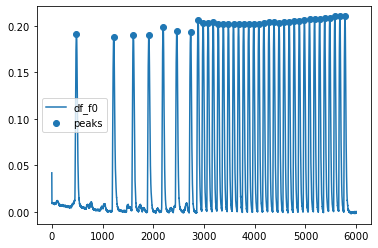

In [53]:
plt.scatter(trace.peaks, trace.df_f0[trace.peaks], label="peaks")
plt.plot(trace.df_f0, label="df_f0")
plt.legend()

# Supplementary Code

### calculating df/f0

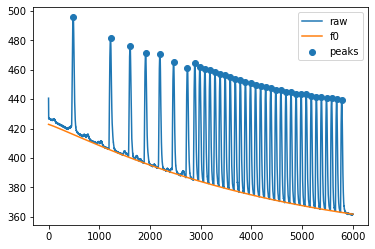

In [35]:
plt.plot(trace.data, label="raw")
plt.plot(trace.baseline, label='f0')
plt.scatter(trace.peaks, trace.data[trace.peaks], label='peaks')
plt.legend()

### accounting for fluorescent decay

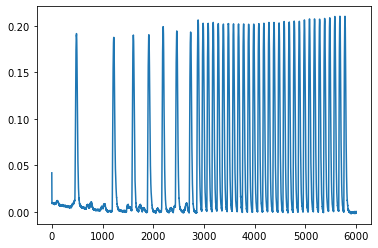

In [36]:
plt.plot(trace.df_f0)

In [10]:
trace.summary().iloc[[0],15:]

,std tau,std fwhm,std contract50,std relax50,std fw90m,std contract90,std relax90
30secstim 30sec1Hz Well 1_1\Full resolution\30secstim 30sec1Hz Well 1_NDTiffStack,0.011572,0.016808,0.01337,0.010275,0.04386,0.0207,0.02849
